<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/explore_nbs/Lenet_GPU_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
!pip install git+https://github.com/fastai/fastcore > /dev/null
!pip install git+https://github.com/fastai/fastai2 > /dev/null

  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-63uhmdc8
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-f_m_2atp


### import libraries

In [5]:
from fastai2.vision.all import *

### load data

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

### datablock and dataloader

In [7]:
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
    item_tfms=Resize(28),
    batch_tfms=[]
)

In [8]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 14434 items
2 datasets of sizes 12396,2038
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_sample/train/7/50359.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_sample/train/7/50359.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=28x28, TensorCategory(1))
    applying Resize gives
      (PILImage mode=RGB size=28x28

In [9]:
dls = datablock.dataloaders(path)
dls.vocab

(#2) ['3','7']

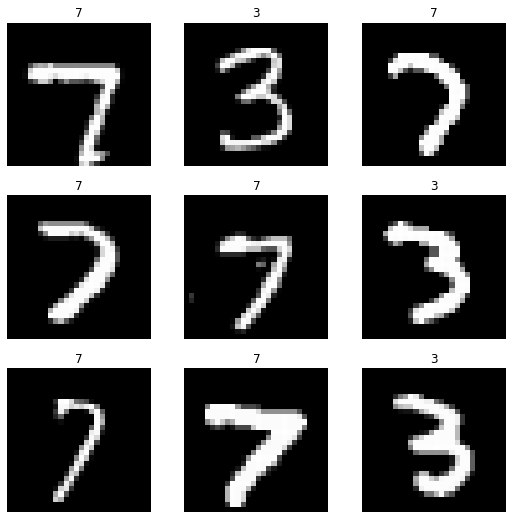

In [10]:
dls.show_batch()

# Lenet with convs and F.max_pool2d

In [11]:
class MyLenet(nn.Module):
    def __init__(self):
        super(MyLenet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.hiden4 = nn.Linear(400, 2) # 2 outputs instead of 10
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = self.hiden4(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


### Import verbose callback

In [12]:
from fastai2.test_utils import *

In [13]:
VerboseCallback?

In [14]:

lenet = MyLenet()
learn = Learner(dls, lenet, metrics=[error_rate, accuracy],cbs=VerboseCallback())


In [15]:
learn.summary()

MyLenet (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 6 x 26 x 26     168        True      
________________________________________________________________
Conv2d               64 x 16 x 11 x 11    880        True      
________________________________________________________________
Linear               64 x 2               802        True      
________________________________________________________________

Total params: 1,850
Total trainable params: 1,850
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f2257da3d90>
Loss function: FlattenedLoss of CrossEntropyLoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback
  - VerboseCallback

In [16]:
learn.show_training_loop()

Start Fit
   - begin_fit      : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - begin_epoch    : [Recorder, ProgressCallback]
    Start Train
       - begin_train    : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - begin_batch    : []
         - after_pred     : []
         - after_loss     : []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - begin_validate : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_cancel_epoch: []
   - after_epo

In [26]:
learn.fit_one_cycle(1)

begin_fit


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.042765,0.056226,0.019627,0.980373,00:24


begin_epoch
begin_train
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_

In [18]:
learn.validate()

begin_fit
begin_epoch


begin_validate
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_p

(#3) [0.07420620322227478,0.02453385666012764,0.9754661321640015]

# Lenet with layers

In [19]:
class Lenet2(nn.Module):
    def __init__(self):
        super(Lenet2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2) # Only 2 outputs instead of 10
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features



In [20]:


lenet2 = Lenet2()
learn2 = Learner(dls,lenet2, metrics=[error_rate, accuracy],cbs=VerboseCallback)


In [21]:
learn2.summary()

Lenet2 (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 6 x 26 x 26     168        True      
________________________________________________________________
Conv2d               64 x 16 x 11 x 11    880        True      
________________________________________________________________
Linear               64 x 120             48,120     True      
________________________________________________________________
Linear               64 x 84              10,164     True      
________________________________________________________________
Linear               64 x 2               170        True      
________________________________________________________________

Total params: 59,502
Total trainable params: 59,502
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f2257da3d90>
Loss function: FlattenedLoss of CrossEntropyLoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCall

In [22]:
learn2.show_training_loop()

Start Fit
   - begin_fit      : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - begin_epoch    : [Recorder, ProgressCallback]
    Start Train
       - begin_train    : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - begin_batch    : []
         - after_pred     : []
         - after_loss     : []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - begin_validate : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_cancel_epoch: []
   - after_epo

In [23]:
xb,yb = learn2.dls.one_batch()

In [25]:

learn2.fit_one_cycle(1)

begin_fit


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.054064,0.035105,0.010795,0.989205,00:25


begin_epoch
begin_train
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_backward
after_step
after_batch
begin_batch
after_pred
after_loss
after_

In [27]:
learn2.validate()

begin_fit
begin_epoch


begin_validate
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_pred
after_loss
after_batch
begin_batch
after_p

(#3) [0.03510477766394615,0.010794896632432938,0.9892051219940186]

# patch one_batch with the code and some extra prints

In [28]:
import traceback

@patch_to(Learner)
def one_batch(self, i, b):
        print(f"******************** self is {self} i is {i}")
        self.iter = i
        try:
            self._split(b);                                  self('begin_batch')
            self.pred = self.model(*self.xb);                self('after_pred')
            if len(self.yb) == 0: return
            self.loss = self.loss_func(self.pred, *self.yb); self('after_loss')
            print(f"******************** self.loss is {self.loss}")
            print(f"******************** self.loss.device = {self.loss.device}")
            if not self.training: return
            print(f"******************** will calculate gradient for loss {type(self.loss)} {self.loss.shape}")
            try:
              self.loss.backward()
            except Exception as e:
              print(f"******************** did fail")
              print(f"{e}")
              tb = sys.exc_info()[2]
              #etype, value, tb = e
              traceback.print_tb(tb) #print_exception(e)

            self.loss.backward();                            self('after_backward')
            print(f"******************** PASSED")
            self.opt.step();                                 self('after_step')
            self.opt.zero_grad()
        except CancelBatchException:                         self('after_cancel_batch')
        finally:                                             self('after_batch')


In [29]:

#my_one_batch(tpu_learner, 0, 64)
print(learn2.splitter)


<function trainable_params at 0x7f2275a08378>


In [30]:

print(learn2._split)


<bound method Learner._split of <fastai2.learner.Learner object at 0x7f2256b405c0>>


In [31]:

learn2.fit(1)

begin_fit


begin_epoch
begin_train
******************** self is <fastai2.learner.Learner object at 0x7f2256b405c0> i is 0
begin_batch
after_pred
after_loss
******************** self.loss is 0.014092803932726383
******************** self.loss.device = cuda:0
******************** will calculate gradient for loss <class 'torch.Tensor'> torch.Size([])
after_batch
after_train
after_epoch
after_fit


RuntimeError: ignored

In [32]:
learn3 = Learner(dls,lenet2, metrics=[error_rate, accuracy])

In [33]:
learn3.summary()

Lenet2 (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 6 x 26 x 26     168        True      
________________________________________________________________
Conv2d               64 x 16 x 11 x 11    880        True      
________________________________________________________________
Linear               64 x 120             48,120     True      
________________________________________________________________
Linear               64 x 84              10,164     True      
________________________________________________________________
Linear               64 x 2               170        True      
________________________________________________________________

Total params: 59,502
Total trainable params: 59,502
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f2257da3d90>
Loss function: FlattenedLoss of CrossEntropyLoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCall

In [34]:
learn3.fit(1)

******************** self is <fastai2.learner.Learner object at 0x7f2256a76a90> i is 0
******************** self.loss is 0.008904187008738518
******************** self.loss.device = cuda:0
******************** will calculate gradient for loss <class 'torch.Tensor'> torch.Size([])


RuntimeError: ignored

In [35]:
learn3.lr_find()

******************** self is <fastai2.learner.Learner object at 0x7f2256a76a90> i is 0
******************** self.loss is 0.1876199096441269
******************** self.loss.device = cuda:0
******************** will calculate gradient for loss <class 'torch.Tensor'> torch.Size([])


RuntimeError: ignored